In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (41.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#final 양극단값 대체

In [ ]:
import pandas as pd
import numpy as np
#pip install folium
raw_data=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/전처리 중 데이터/날씨EDA.csv", encoding='euc-kr')
cctv_data=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/CCTV현황_ver4.csv", encoding='euc-kr')
df = raw_data.drop(["cctvid"], axis=1)
df= df.replace(0, np.nan).dropna()
# cctvid를 기준으로 두 데이터프레임을 결합
merged_data = pd.merge(cctv_data, raw_data, on='cctvid', how='inner')
merged_data= merged_data.replace(0, np.nan).dropna()
merged_data = merged_data.drop(["소재지지번주소"], axis=1)
# 결과 출력
print(merged_data)

             위도          경도  cctvid        관측소_거리       미세먼지      초미세먼지  \
0     37.737015  127.077234   27732    410.618719  31.498714  17.836081   
1     37.277578  127.613895   23150   2478.272099  36.198997  21.231150   
2     37.275391  127.637498   23218    754.534390  35.886641  21.002951   
3     37.303568  127.002626   13029   5440.834426  33.861586  16.938448   
4     37.717627  127.048025   28171   2944.528917  31.815249  17.459207   
...         ...         ...     ...           ...        ...        ...   
9995  37.488233  126.778895    8426   1926.335513  33.534840  18.182649   
9996  37.480422  127.485891   21307  13227.244753  32.421982  19.749770   
9997  37.700965  127.198053    6071   7183.591012  30.333547  16.877815   
9998  37.468841  126.849624    2091   1765.773760  35.183028  19.009707   
9999  36.993488  126.901051   32129  15159.782711  38.913724  22.982480   

         아황산가스        오존     이산화질소     일산화탄소  
0     0.002601  0.028917  0.018549  0.334228  
1    

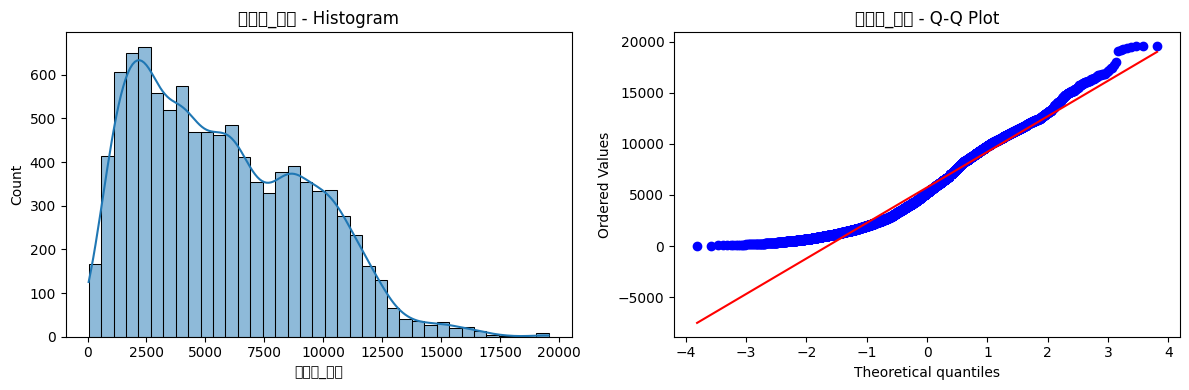

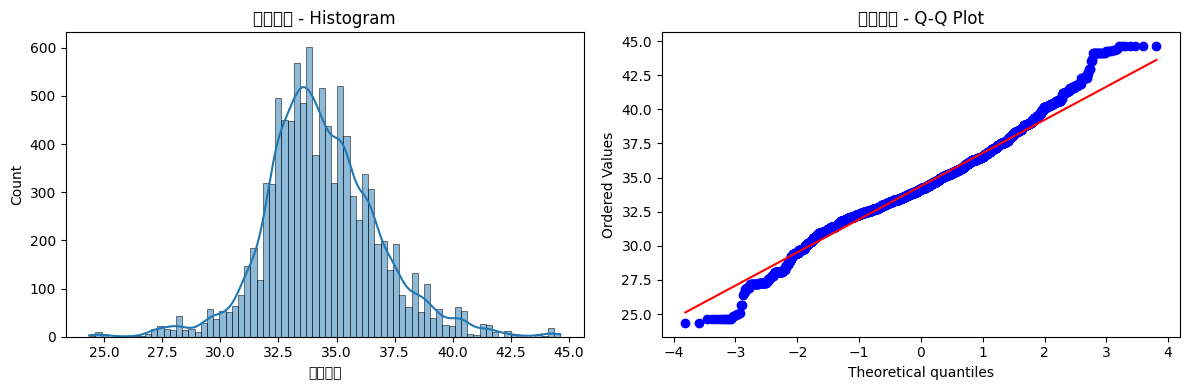

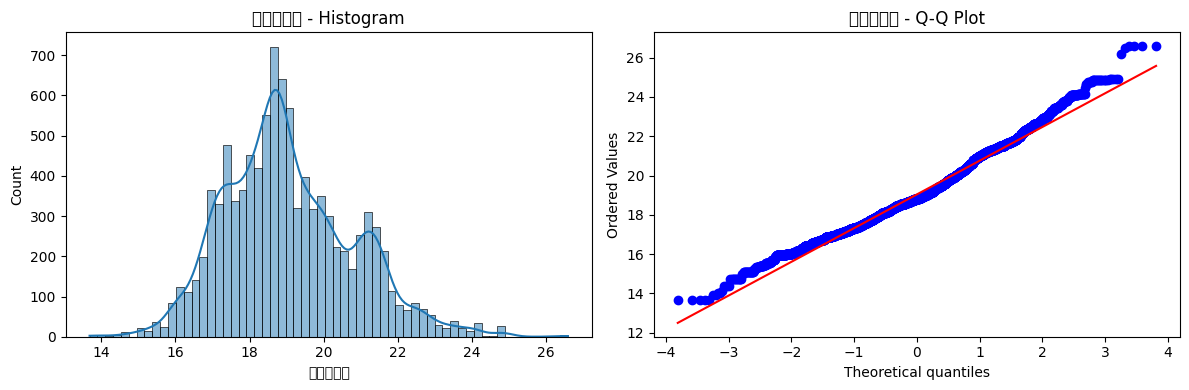

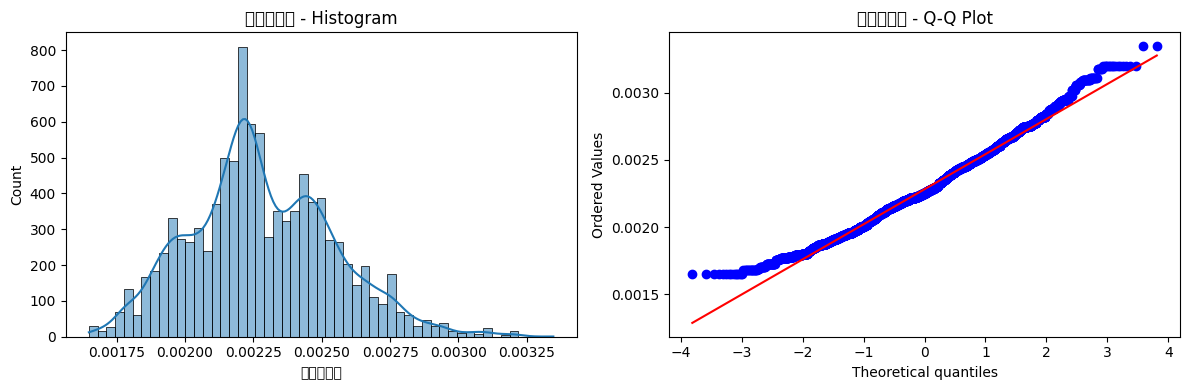

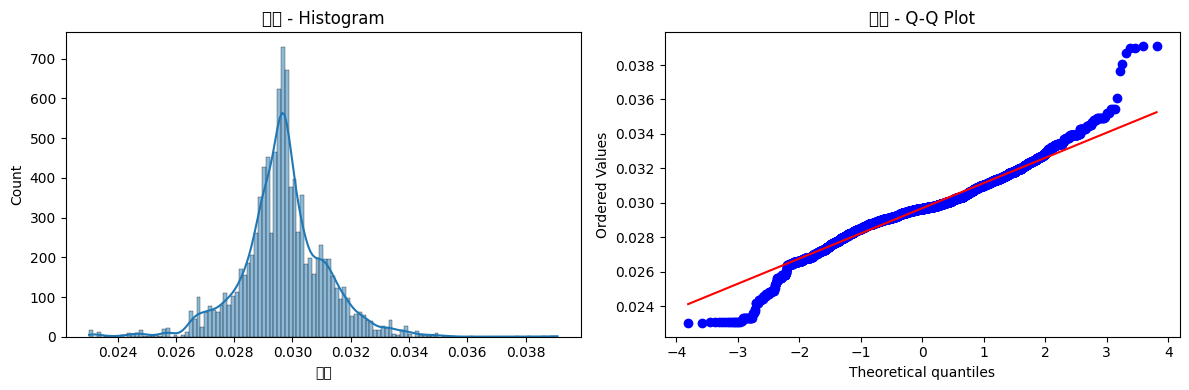

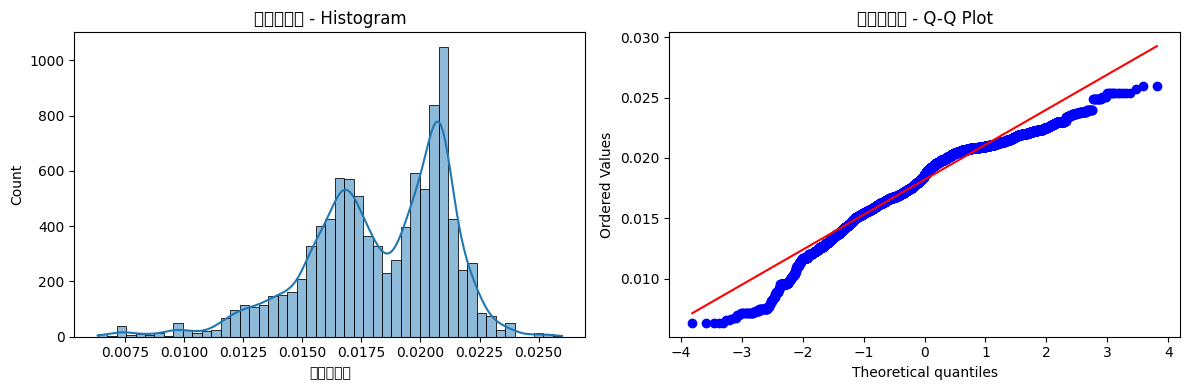

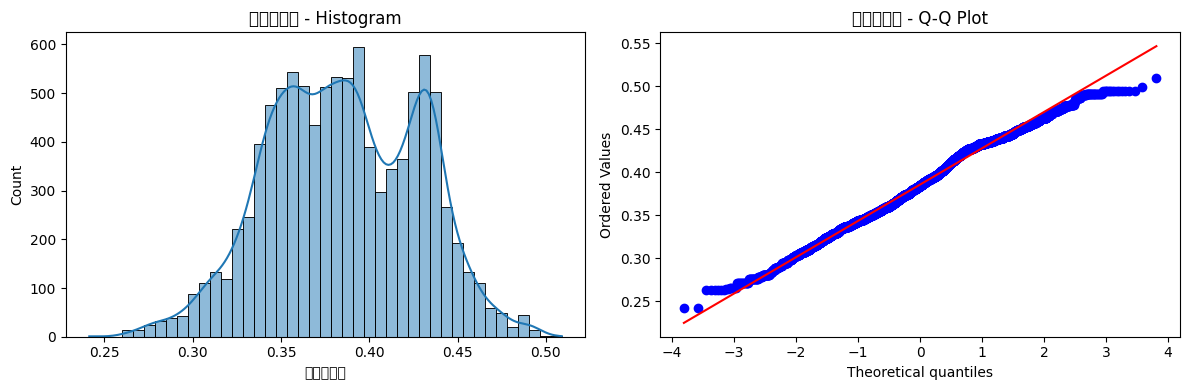

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

selected_columns = ['관측소_거리','미세먼지', '초미세먼지', '아황산가스', '오존', '이산화질소', '일산화탄소']

for column in selected_columns:
    plt.figure(figsize=(12, 4))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - Histogram')

    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'{column} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro, anderson


# 검정 수행 및 결과 출력

selected_columns = ['관측소_거리','미세먼지', '초미세먼지', '아황산가스', '오존', '이산화질소', '일산화탄소']

for column in selected_columns:
    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(df[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat_shapiro}, p-value={p_value_shapiro}, {"Not normal" if p_value_shapiro < 0.05 else "Normal"}')

    # Anderson-Darling test
    result_anderson = anderson(df[column])
    print(f'Anderson-Darling test for {column}: Statistic={result_anderson.statistic}, Critical Values={result_anderson.critical_values}, Significance Levels={result_anderson.significance_level}, {"Not normal" if result_anderson.statistic > result_anderson.critical_values[2] else "Normal"}')

    print('-' * 50)


Shapiro-Wilk test for 관측소_거리: Statistic=0.956658124923706, p-value=0.0, Not normal
Anderson-Darling test for 관측소_거리: Statistic=122.25894148091356, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 미세먼지: Statistic=0.9803113341331482, p-value=6.182427590315875e-35, Not normal
Anderson-Darling test for 미세먼지: Statistic=50.884843198788076, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 초미세먼지: Statistic=0.9835426211357117, p-value=2.0729729735419774e-32, Not normal
Anderson-Darling test for 초미세먼지: Statistic=52.27132451365469, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 아황산가스: Statistic=0.990643441

          관측소_거리      미세먼지     초미세먼지     아황산가스        오존     이산화질소     일산화탄소
관측소_거리  1.000000  0.049781  0.072854 -0.142768  0.084562 -0.108119  0.134692
미세먼지    0.049781  1.000000  0.696627  0.279124  0.290041  0.190215 -0.050606
초미세먼지   0.072854  0.696627  1.000000  0.271812  0.316700 -0.256436 -0.246704
아황산가스  -0.142768  0.279124  0.271812  1.000000  0.208999 -0.078180 -0.594157
오존      0.084562  0.290041  0.316700  0.208999  1.000000 -0.227403 -0.141594
이산화질소  -0.108119  0.190215 -0.256436 -0.078180 -0.227403  1.000000  0.438707
일산화탄소   0.134692 -0.050606 -0.246704 -0.594157 -0.141594  0.438707  1.000000


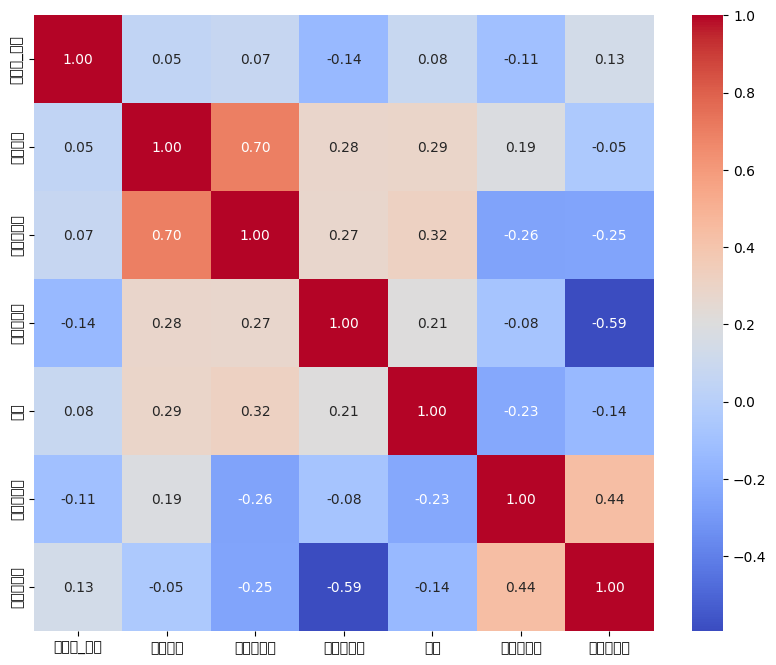

In [ ]:
import pandas as pd

# df: 데이터프레임
correlation_matrix = df.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

# 시각화 (예시: seaborn의 heatmap 사용)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# 로그 정규화 수행
df_log = np.log1p(df)
df_log
# 결과 출력
print("Original DataFrame:")
print(df)
print("\nLog-transformed DataFrame:")
print(df_log)

Original DataFrame:
            관측소_거리       미세먼지      초미세먼지     아황산가스        오존     이산화질소  \
0       410.618719  31.498714  17.836081  0.002601  0.028917  0.018549   
1      2478.272099  36.198997  21.231150  0.002275  0.029683  0.015465   
2       754.534390  35.886641  21.002951  0.002269  0.029679  0.015476   
3      5440.834426  33.861586  16.938448  0.002136  0.029796  0.020958   
4      2944.528917  31.815249  17.459207  0.002643  0.029349  0.017278   
...            ...        ...        ...       ...       ...       ...   
9995   1926.335513  33.534840  18.182649  0.001915  0.030839  0.020920   
9996  13227.244753  32.421982  19.749770  0.001911  0.028841  0.012196   
9997   7183.591012  30.333547  16.877815  0.001984  0.031797  0.013047   
9998   1765.773760  35.183028  19.009707  0.002078  0.029610  0.020523   
9999  15159.782711  38.913724  22.982480  0.002499  0.032014  0.016369   

         일산화탄소  
0     0.334228  
1     0.347770  
2     0.349678  
3     0.411717  
4     

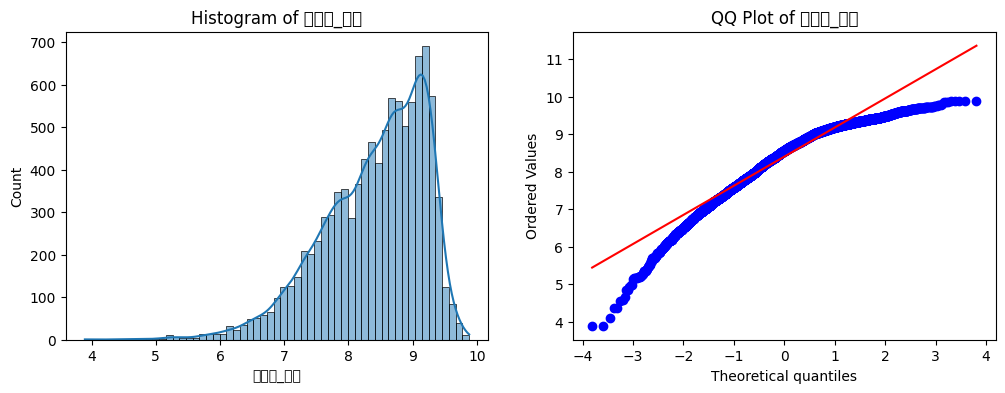

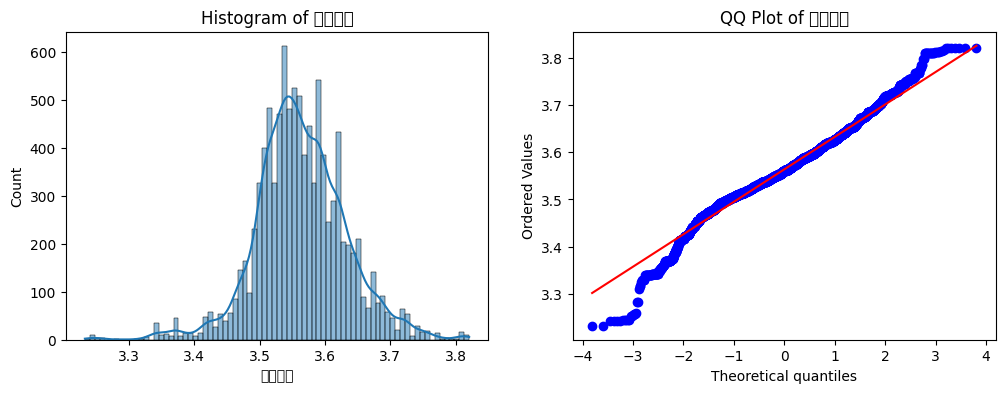

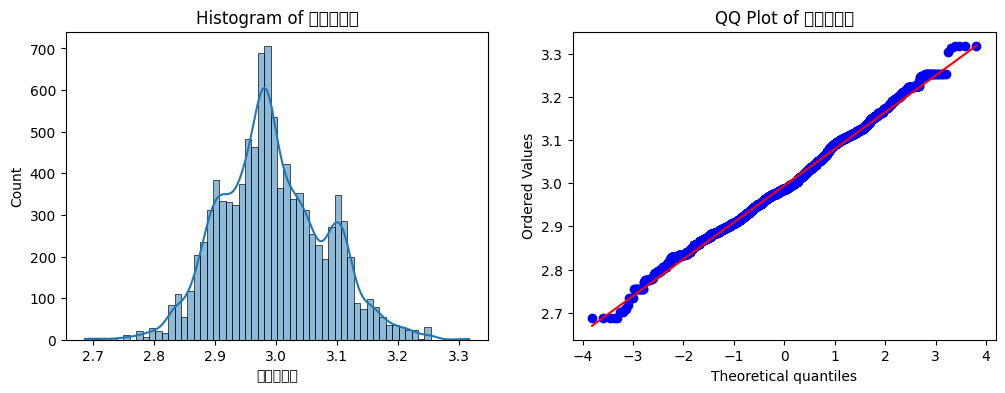

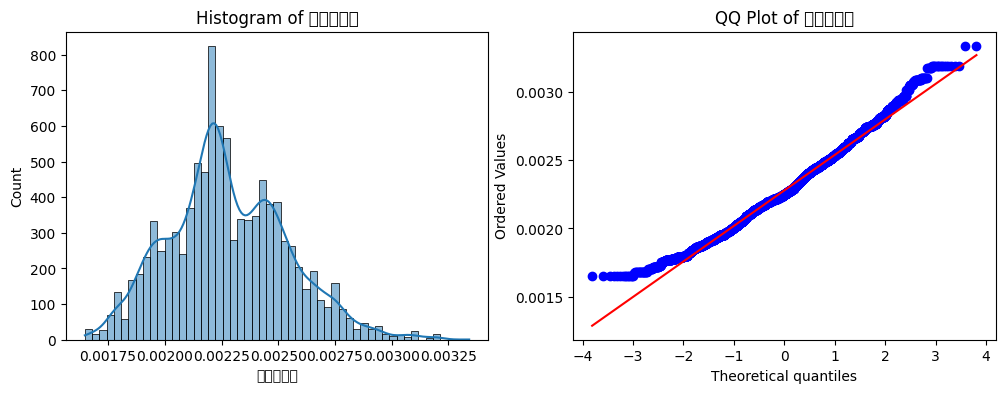

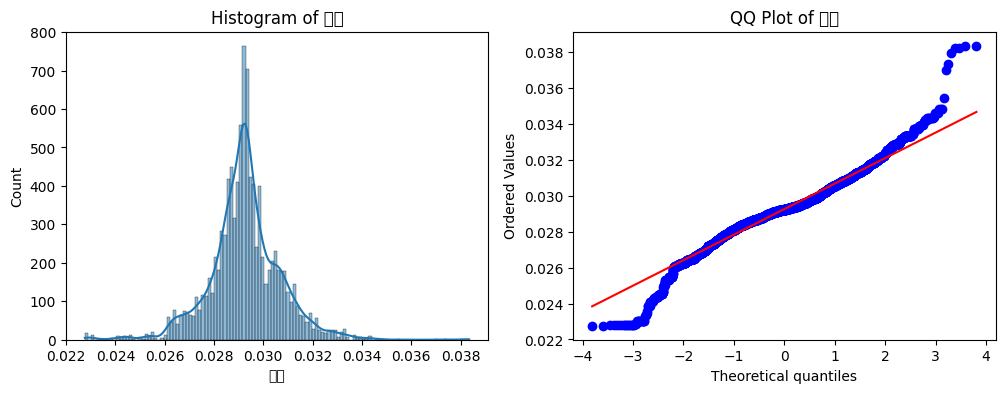

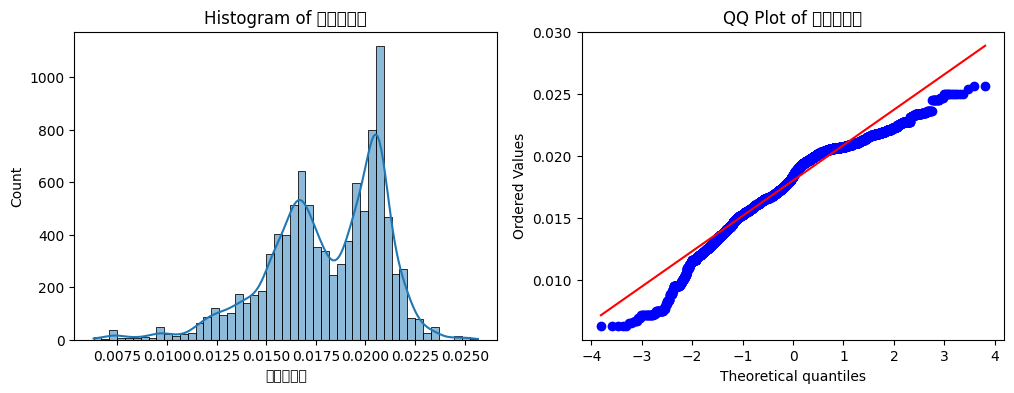

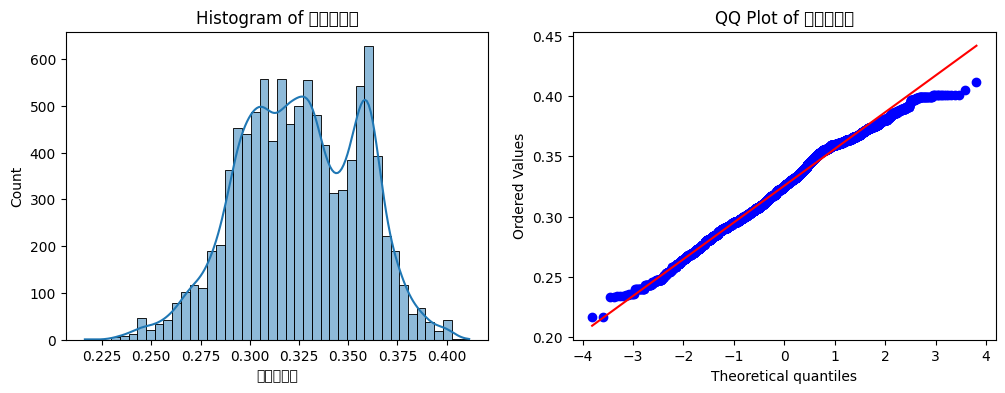

In [ ]:
# 히스토그램 및 QQ 플롯
for column in df_log.columns:
    plt.figure(figsize=(12, 4))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df_log[column], kde=True)
    plt.title(f'Histogram of {column}')

    # QQ 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(df_log[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')

    plt.show()


          관측소_거리      미세먼지     초미세먼지     아황산가스        오존     이산화질소     일산화탄소
관측소_거리  1.000000  0.027859  0.046850 -0.103326  0.058226 -0.104604  0.117875
미세먼지    0.027859  1.000000  0.686256  0.270742  0.293092  0.217772 -0.036823
초미세먼지   0.046850  0.686256  1.000000  0.261898  0.317275 -0.251153 -0.236411
아황산가스  -0.103326  0.270742  0.261898  1.000000  0.208915 -0.077689 -0.590781
오존      0.058226  0.293092  0.317275  0.208915  1.000000 -0.226306 -0.142042
이산화질소  -0.104604  0.217772 -0.251153 -0.077689 -0.226306  1.000000  0.436345
일산화탄소   0.117875 -0.036823 -0.236411 -0.590781 -0.142042  0.436345  1.000000


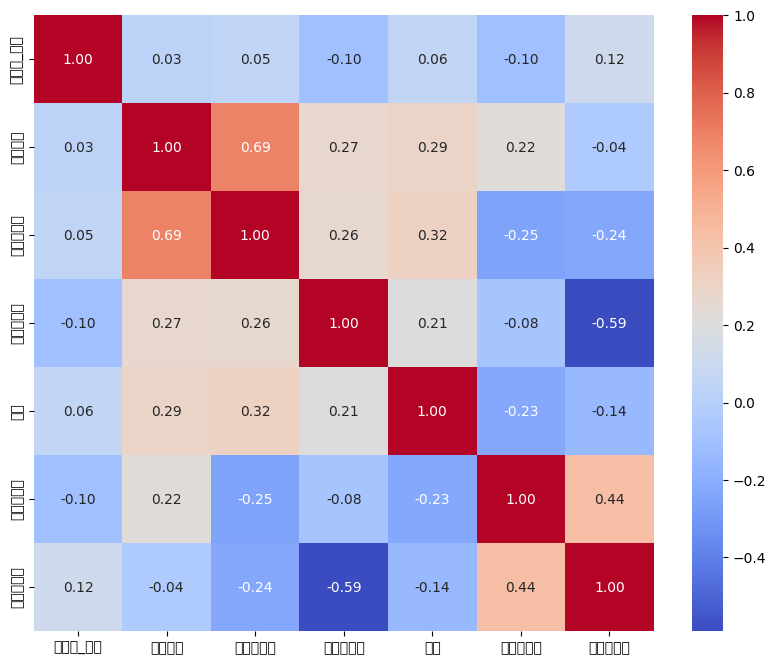

In [ ]:
import pandas as pd

# df: 데이터프레임
correlation_matrix = df_log.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

# 시각화 (예시: seaborn의 heatmap 사용)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro, anderson


# 검정 수행 및 결과 출력

selected_columns = ['관측소_거리','미세먼지', '초미세먼지', '아황산가스', '오존', '이산화질소', '일산화탄소']

for column in selected_columns:
    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(df_log[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat_shapiro}, p-value={p_value_shapiro}, {"Not normal" if p_value_shapiro < 0.05 else "Normal"}')

    # Anderson-Darling test
    result_anderson = anderson(df_log[column])
    print(f'Anderson-Darling test for {column}: Statistic={result_anderson.statistic}, Critical Values={result_anderson.critical_values}, Significance Levels={result_anderson.significance_level}, {"Not normal" if result_anderson.statistic > result_anderson.critical_values[2] else "Normal"}')

    print('-' * 50)


Shapiro-Wilk test for 관측소_거리: Statistic=0.9408807754516602, p-value=0.0, Not normal
Anderson-Darling test for 관측소_거리: Statistic=145.09416624267033, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 미세먼지: Statistic=0.9822561144828796, p-value=1.8552553669249613e-33, Not normal
Anderson-Darling test for 미세먼지: Statistic=37.784449070490155, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 초미세먼지: Statistic=0.9935518503189087, p-value=7.967623379960972e-21, Not normal
Anderson-Darling test for 초미세먼지: Statistic=25.345734461760003, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 아황산가스: Statistic=0.9906710

In [ ]:
selected_columns = ['관측소_거리','미세먼지', '초미세먼지', '아황산가스', '오존', '이산화질소', '일산화탄소']

for column in selected_columns:
    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(df_log[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat_shapiro}, p-value={p_value_shapiro}, {"Not normal" if p_value_shapiro < 0.05 else "Normal"}')

    # Anderson-Darling test
    result_anderson = anderson(df_log[column])
    print(f'Anderson-Darling test for {column}: Statistic={result_anderson.statistic}, Critical Values={result_anderson.critical_values}, Significance Levels={result_anderson.significance_level}, {"Not normal" if result_anderson.statistic > result_anderson.critical_values[2] else "Normal"}')

    print('-' * 50)

Shapiro-Wilk test for 관측소_거리: Statistic=0.9408807754516602, p-value=0.0, Not normal
Anderson-Darling test for 관측소_거리: Statistic=145.09416624267033, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 미세먼지: Statistic=0.9822561144828796, p-value=1.8552553669249613e-33, Not normal
Anderson-Darling test for 미세먼지: Statistic=37.784449070490155, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 초미세먼지: Statistic=0.9935518503189087, p-value=7.967623379960972e-21, Not normal
Anderson-Darling test for 초미세먼지: Statistic=25.345734461760003, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 아황산가스: Statistic=0.9906710

#1 CAI 지수화

In [ ]:
cctv = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/CCTV현황_ver4.csv", encoding="CP949")
weather = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_aws.csv", encoding="CP949")
trash = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_폐기물300.csv", encoding="CP949")
pm10 = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_미세먼지pm10.csv", encoding="CP949")
pm25 = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_미세먼지pm2.csv", encoding="CP949")
school = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv_학교_최종_10.csv", encoding="CP949")
SO2 = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_아황산가스.csv", encoding="CP949")
O3 = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_오존농도.csv", encoding="CP949")
NO2 = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_이산화질소.csv", encoding="CP949")
CO = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv4_일산화탄소.csv", encoding="CP949")
subway = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv_지하철_최종_10.csv", encoding="CP949")
bus = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/cctv_버스300.csv", encoding="CP949")
# +10 역거리 함수데이터 활용

In [ ]:
weather = weather.rename(columns={"distance":"관측소_거리"})
weather = weather[["cctvid", "관측소_거리"]]

pm10 = pm10.rename(columns={"미세먼지pm10":"미세먼지"})
pm10 = pm10[["cctvid", "미세먼지"]]
pm10 = pm10.fillna(0)

pm25 = pm25.rename(columns={"미세먼지pm2":"초미세먼지"})
pm25 = pm25[["cctvid", "초미세먼지"]]
pm25 = pm25.fillna(0)

SO2 = SO2[["cctvid", "아황산가스"]]
SO2 = SO2.fillna(0)

O3 = O3.rename(columns={"오존농도":"오존"})
O3 = O3[["cctvid", "오존"]]
O3 = O3.fillna(0)

NO2 = NO2[["cctvid", "이산화질소"]]
NO2 = NO2.fillna(0)

CO = CO[["cctvid", "일산화탄소"]]
CO = CO.fillna(0)

subway = subway.rename(columns={"지하철_중요도지수":"지하철역_지표"})
subway = subway[["cctvid", "지하철역_지표"]]

bus = bus.groupby("cctvid").agg({"이용객수":"first", "distance":"count"}).reset_index()
bus = bus.rename(columns={"distance": "버스정류장_개수", "이용객수":"버스정류장_이용객수"})
bus = cctv.merge(bus, on=["cctvid"], how="outer")
bus = bus.fillna(0)
bus[["버스정류장_이용객수", "버스정류장_개수"]] = bus[["버스정류장_이용객수", "버스정류장_개수"]].astype(int)
bus = bus[["cctvid", "버스정류장_이용객수"]]

trash = trash[["cctvid", "distance"]]
trash = trash.groupby("cctvid").count()
trash = trash.rename(columns={"distance":"처리시설_개수"})
trash = cctv.merge(trash, on=["cctvid"], how="outer")
trash = trash.fillna(0)
trash["처리시설_개수"] = trash["처리시설_개수"].astype(int)
trash = trash[["cctvid", "처리시설_개수"]]

school = school.rename(columns={"학교거리_역수":"학교_거리"})
school = school[["cctvid", "학교_거리"]]

In [ ]:
df = weather.merge(pm10, on=["cctvid"])
df = df.merge(pm25, on=["cctvid"])
df = df.merge(SO2, on=["cctvid"])
df = df.merge(O3, on=["cctvid"])
df = df.merge(NO2, on=["cctvid"])
df = df.merge(CO, on=["cctvid"])
df = df.merge(subway, on=["cctvid"])
df = df.merge(bus, on=["cctvid"])
df = df.merge(trash, on=["cctvid"])
df = df.merge(school, on=["cctvid"])

In [ ]:
def C24E(pm, is_pm10 = True):
    if is_pm10 == True:
        M = 70
    else:
        M = 30
    final = []

    for i in range(len(pm)):
        if i < 11:
            result = pm[i]
            final.append(result)
        else:
            C_12 = np.mean(pm[i-11:i+1])
            if (pm[i] >= M) & (0.9<=(pm[i]/C_12)<=1.7):
                pm[i] = 0.75 * pm[i]
            C_12 = np.mean(pm[i-11:i+1])
            C_4 = np.mean(pm[i-3:i+1])
            result = (C_12 * 12 + C_4 * 12) / 24
            final.append(result)

    return final

I_score = {1 : {"low" : 0, "high" : 50},
           2 : {"low" : 51, "high" : 100},
           3 : {"low" : 101, "high" : 250},
           4 : {"low" : 251, "high" : 350},
           5 : {"low" : 351, "high" : 500}}

BP_score = {"아황산가스" : {1 : {"low" : 0, "high" : 0.02},
                     2 : {"low" : 0.021, "high" : 0.05},
                     3 : {"low" : 0.051, "high" : 0.15},
                     4 : {"low" : 0.151, "high" : 0.4},
                     5 : {"low" : 0.401, "high" : 1}},
            "일산화탄소": {1: {"low": 0, "high": 2},
                    2: {"low": 2.1, "high": 9},
                    3: {"low": 9.1, "high": 15},
                    4: {"low": 15.1, "high": 30},
                    5: {"low": 30.1, "high": 50}},
            "오존" : {1 : {"low" : 0, "high" : 0.03},
                     2 : {"low" : 0.031, "high" : 0.09},
                     3 : {"low" : 0.091, "high" : 0.15},
                     4 : {"low" : 0.151, "high" : 0.5},
                     5 : {"low" : 0.501, "high" : 0.6}},
            "이산화질소" : {1 : {"low" : 0, "high" : 0.03},
                     2 : {"low" : 0.031, "high" : 0.06},
                     3 : {"low" : 0.061, "high" : 0.2},
                     4 : {"low" : 0.201, "high" : 0.6},
                     5 : {"low" : 0.601, "high" : 2}},
            "미세먼지_24" : {1 : {"low" : 0, "high" : 30},
                      2 : {"low" : 31, "high" : 80},
                      3 : {"low" : 81, "high" : 150},
                      4 : {"low" : 151, "high" : 300},
                      5 : {"low" : 301, "high" : 600}},
            "초미세먼지_24" : {1 : {"low" : 0, "high" : 15},
                      2 : {"low" : 16, "high" : 35},
                      3 : {"low" : 36, "high" : 75},
                      4 : {"low" : 76, "high" : 250},
                      5 : {"low" : 251, "high" : 500}}
            }

pollution_limit = {"아황산가스" : np.array([-1, 0.02, 0.05, 0.15, 0.4, 1]),
                   "일산화탄소" : np.array([-1, 2, 9, 15, 30, 50]),
                   "오존" : np.array([-1, 0.03, 0.09, 0.15, 0.5, 0.6]),
                   "이산화질소" : np.array([-1, 0.03, 0.06, 0.2, 0.6, 2]),
                   "미세먼지_24": np.array([-1, 30, 80, 150, 300, 600]),
                   "초미세먼지_24": np.array([-1, 15, 35, 75, 250, 500])}

def CAI(labeled, df, pollution):
    I = I_score[labeled]["high"] - I_score[labeled]["low"]
    BP = BP_score[pollution][labeled]["high"] - BP_score[pollution][labeled]["low"]

    return I/BP*(df - BP_score[pollution][labeled]["low"]) + I_score[labeled]["low"]

def final_CAI(count, cai):
    if count >= 3:
        cai = cai + 75
    elif count >= 2:
        cai = cai + 50
    return cai

def Calculate_CAI(data):
    pm10_24 = C24E(data["미세먼지"].to_numpy().copy())
    pm25_24 = C24E(data["초미세먼지"].to_numpy().copy(), is_pm10=False)

    data["미세먼지_24"] = pm10_24
    data["초미세먼지_24"] = pm25_24

    df = data.loc[:, ["아황산가스", "일산화탄소", "오존", "이산화질소", "미세먼지_24", "초미세먼지_24"]].copy()

    length = len(df.columns)
    for i in range(length):
        df[df.columns[i] + "_name"] = df.columns[i]
        df[df.columns[i] + "_label"] = np.digitize(df[df.columns[i]], pollution_limit[df.columns[i]], right=True)
        df[df.columns[i] + "_CAI"] = list(map(CAI, df[df.columns[i] + "_label"], df[df.columns[i]], df[df.columns[i] + "_name"]))

    col_label = df.loc[:, ["아황산가스_label", "일산화탄소_label", "오존_label", "이산화질소_label", "미세먼지_24_label", "초미세먼지_24_label"]]
    col_CAI = df.loc[:, ["아황산가스_CAI", "일산화탄소_CAI", "오존_CAI", "이산화질소_CAI", "미세먼지_24_CAI", "초미세먼지_24_CAI"]]

    data["CAI"] = list(map(final_CAI, (col_label > 2).sum(axis=1), col_CAI.max(axis=1)))

Calculate_CAI(df)
df = df[["cctvid", "관측소_거리", "버스정류장_이용객수", "지하철역_지표", "학교_거리", "처리시설_개수", "CAI"]]

In [ ]:
df["cctvid"] = df["cctvid"].astype(int)

In [ ]:
df

In [ ]:
from google.colab import files
# df4를 적절한 파일 이름으로 CSV 파일로 저장
df.to_csv('최종조인데이터_지수변환후_10.csv', index=False, encoding='euc-kr')
# 파일을 다운로드
files.download('최종조인데이터_지수변환후_10.csv')


In [ ]:
final =  pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/최종데이터_final_ver1.csv", encoding="CP949")

#1 최종 데이터 시각화

In [ ]:
import pandas as pd
import numpy as np
#pip install folium

data_final_10=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/최종조인데이터_지수변환후_10.csv", encoding='euc-kr')

In [ ]:
dff=data_final_10
dff

,cctvid,관측소_거리,버스정류장_이용객수,지하철역_지표,학교_거리,처리시설_개수,CAI
0,27732,410.618719,1105,4734.835481,0.003987,1,55.735156
1,23150,2478.272099,10,1223.498595,0.004408,0,64.490861
2,23218,754.534390,555,1519.760748,0.001708,2,63.902347
3,13029,5440.834426,8349,2137.518541,0.002264,0,53.861586
4,28171,2944.528917,648,11564.442909,0.002774,0,54.763218
...,...,...,...,...,...,...,...
9995,8426,1926.335513,2083,37705.964955,0.002284,4,58.978887
9996,21307,13227.244753,30,4557.375535,0.001101,0,59.136582
9997,6071,7183.591012,1398,616.003012,0.001732,0,57.693381
9998,2091,1765.773760,1877,11317.730672,0.004915,1,58.251577


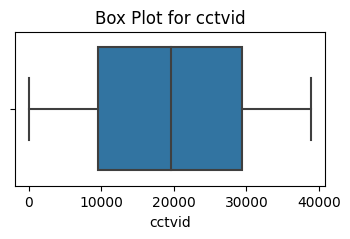

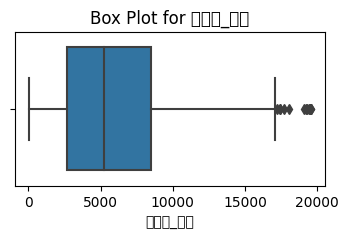

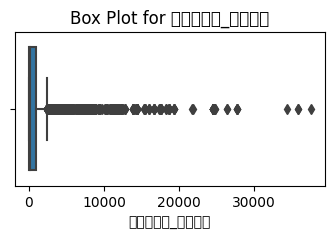

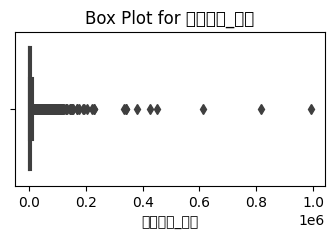

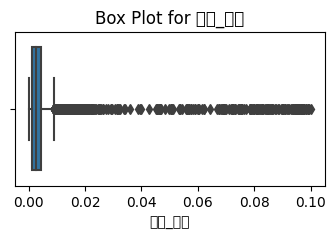

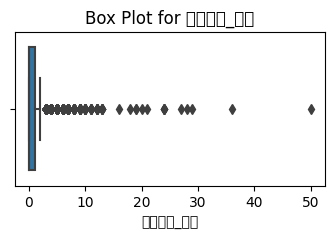

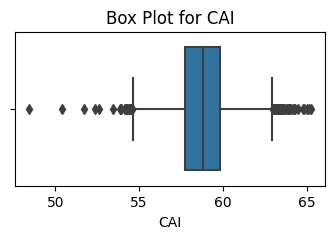

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임과 선택한 컬럼들
data = dff
selected_columns = ['cctvid', '관측소_거리', '버스정류장_이용객수', '지하철역_지표', '학교_거리', '처리시설_개수', 'CAI']

# 각 컬럼별로 Box Plot 그리기
for column in selected_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=column, data=data)
    plt.title(f'Box Plot for {column}')
    plt.show()


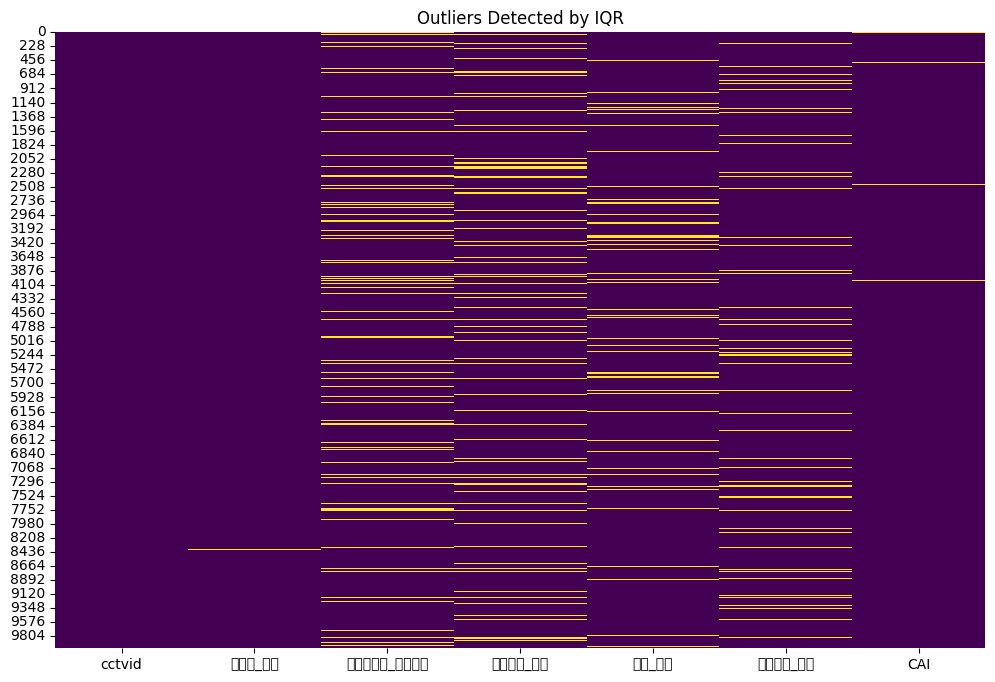

In [ ]:
data= dff
selected_columns = ['cctvid','관측소_거리', '버스정류장_이용객수', '지하철역_지표', '학교_거리', '처리시설_개수', 'CAI']
data = data[selected_columns]

# IQR을 계산합니다.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# 이상치를 찾습니다.
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# 이상치를 시각화합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(outliers, cmap='viridis', cbar=False)
plt.title('Outliers Detected by IQR')
plt.show()

In [ ]:
from sklearn.impute import KNNImputer

# 이상치 식별
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# 이상치 마스크 생성
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# KNN 대체를 위한 Imputer 생성
knn_imputer = KNNImputer(n_neighbors=5)

# 이상치를 NaN으로 대체
data[outliers] = None

# KNN을 사용하여 NaN을 대체
data_no_outliers = knn_imputer.fit_transform(data)
df_no_outliers = pd.DataFrame(data_no_outliers, columns=data.columns)

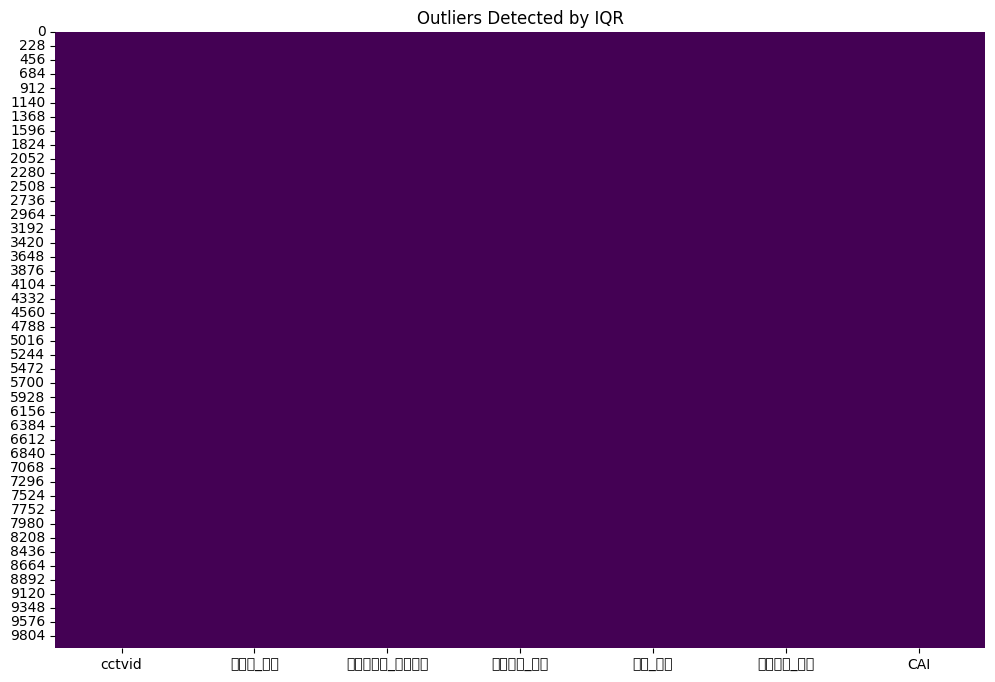

In [ ]:
# 이상치를 찾습니다.
outliers = ((df_no_outliers < (Q1 - 1.5 * IQR)) | (df_no_outliers > (Q3 + 1.5 * IQR)))

# 이상치를 시각화합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(outliers, cmap='viridis', cbar=False)
plt.title('Outliers Detected by IQR')
plt.show()

              cctvid    관측소_거리  버스정류장_이용객수   지하철역_지표     학교_거리   처리시설_개수  \
cctvid      1.000000  0.130217   -0.255283 -0.293560 -0.180006 -0.054668   
관측소_거리      0.130217  1.000000   -0.187395 -0.246379 -0.090165 -0.119569   
버스정류장_이용객수 -0.255283 -0.187395    1.000000  0.358314  0.293497  0.197666   
지하철역_지표    -0.293560 -0.246379    0.358314  1.000000  0.286682  0.173558   
학교_거리      -0.180006 -0.090165    0.293497  0.286682  1.000000  0.106722   
처리시설_개수    -0.054668 -0.119569    0.197666  0.173558  0.106722  1.000000   
CAI         0.179750  0.029652   -0.111190 -0.100108 -0.062898  0.007520   

                 CAI  
cctvid      0.179750  
관측소_거리      0.029652  
버스정류장_이용객수 -0.111190  
지하철역_지표    -0.100108  
학교_거리      -0.062898  
처리시설_개수     0.007520  
CAI         1.000000  


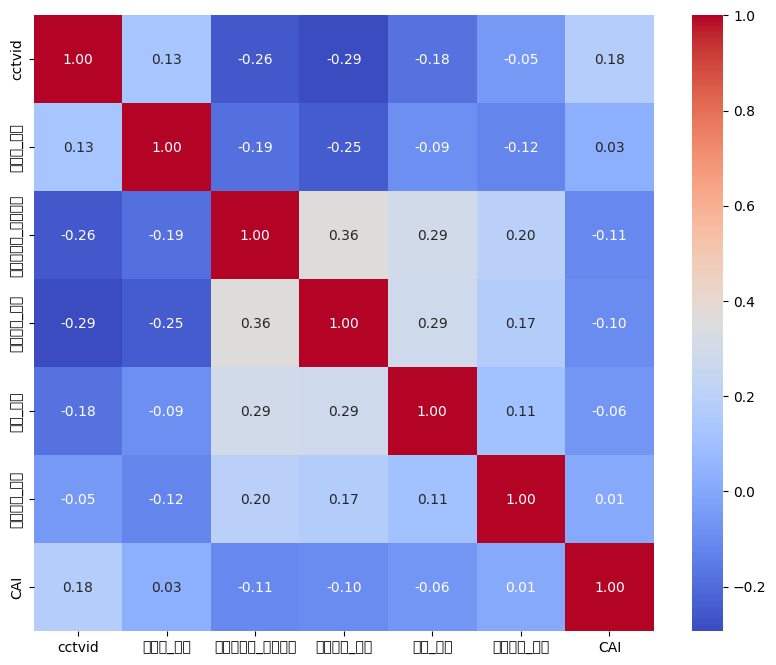

In [ ]:
import pandas as pd

# df: 데이터프레임
correlation_matrix = df_no_outliers.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

# 시각화 (예시: seaborn의 heatmap 사용)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
from google.colab import files
# df4를 적절한 파일 이름으로 CSV 파일로 저장
df_no_outliers.to_csv('최종데이터_final_ver1.csv', index=False, encoding='euc-kr')
# 파일을 다운로드
files.download('최종데이터_final_ver1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

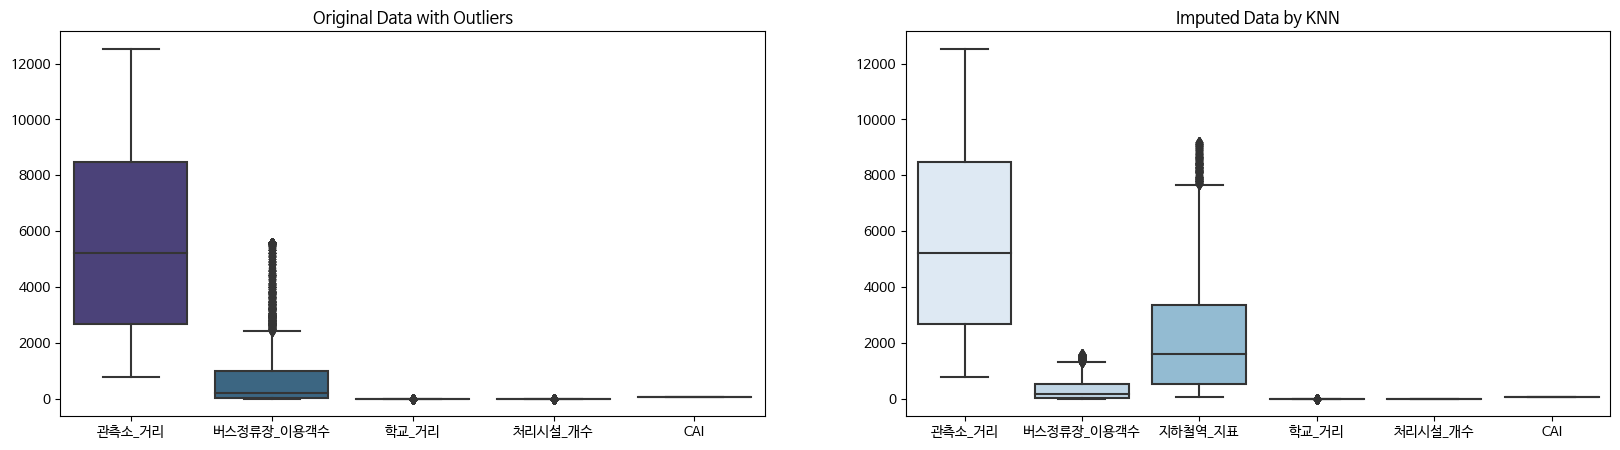

In [ ]:
selected_columns = ['관측소_거리', '버스정류장_이용객수', '지하철역_지표', '학교_거리', '처리시설_개수', 'CAI']
# 시각화
plt.figure(figsize=(20, 5))

# 원래의 이상치를 상자 그림으로 표시
plt.subplot(1, 2, 1)
dff = dff[selected_columns]
sns.boxplot(dff, palette='viridis')
plt.title('Original Data with Outliers')
# KNN으로 대체된 값을 상자 그림으로 표시
plt.subplot(1, 2, 2)
sns.boxplot(df_no_outliers, palette='Blues')
plt.title('Imputed Data by KNN')

plt.show()

#1 양 극단값 대체

#1 IQR이상치 대체한 최종데이터 시각화

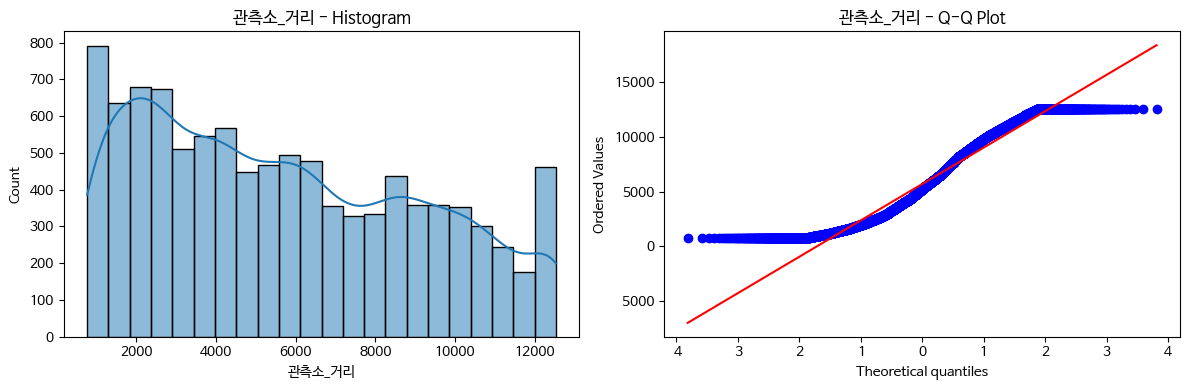

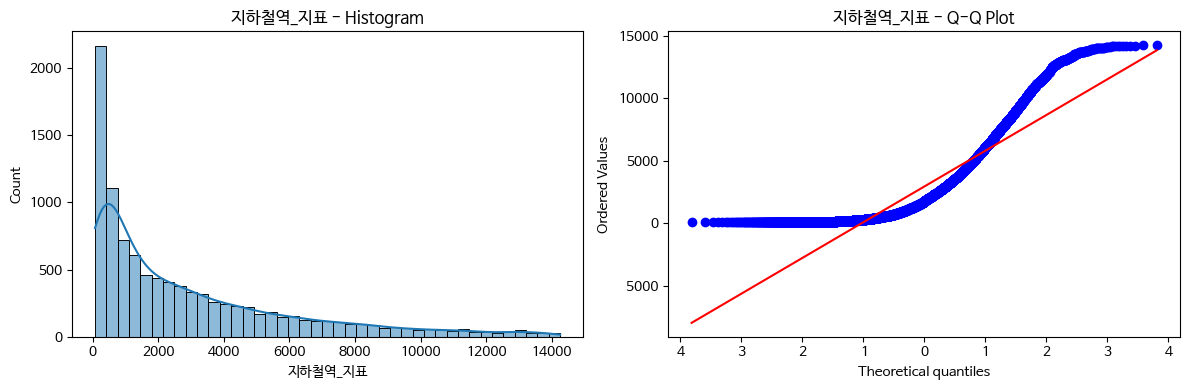

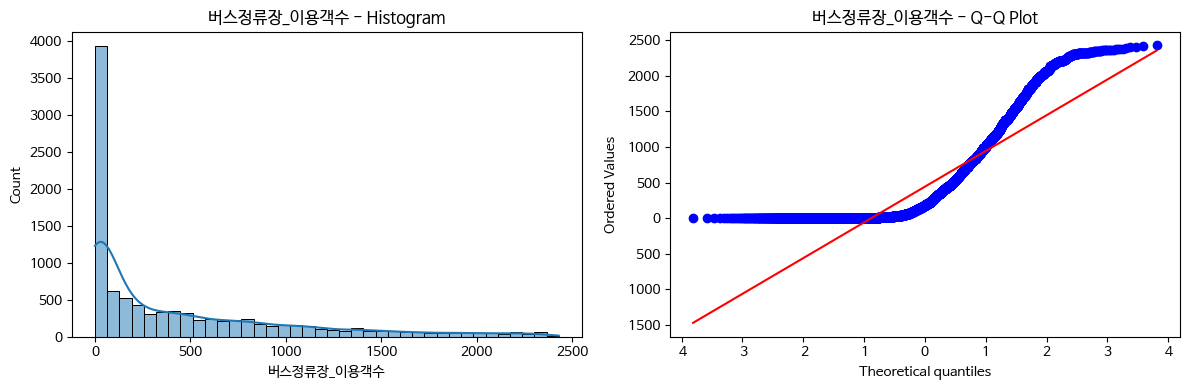

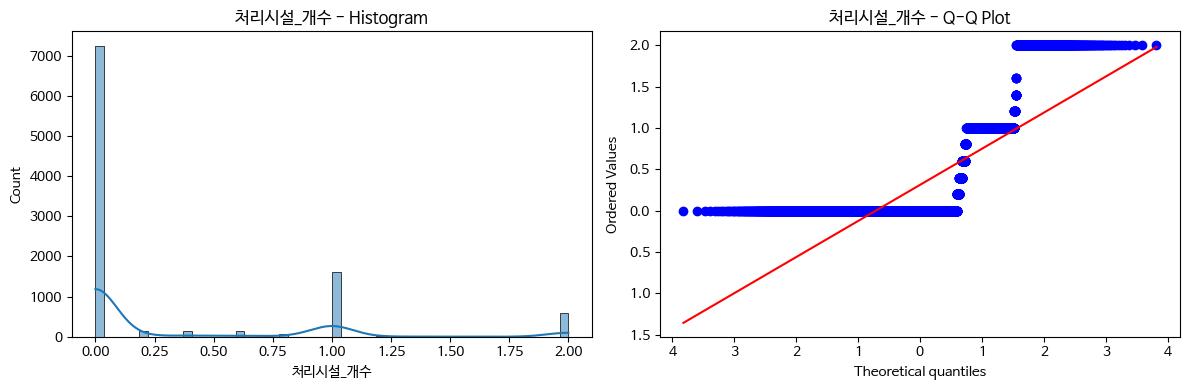

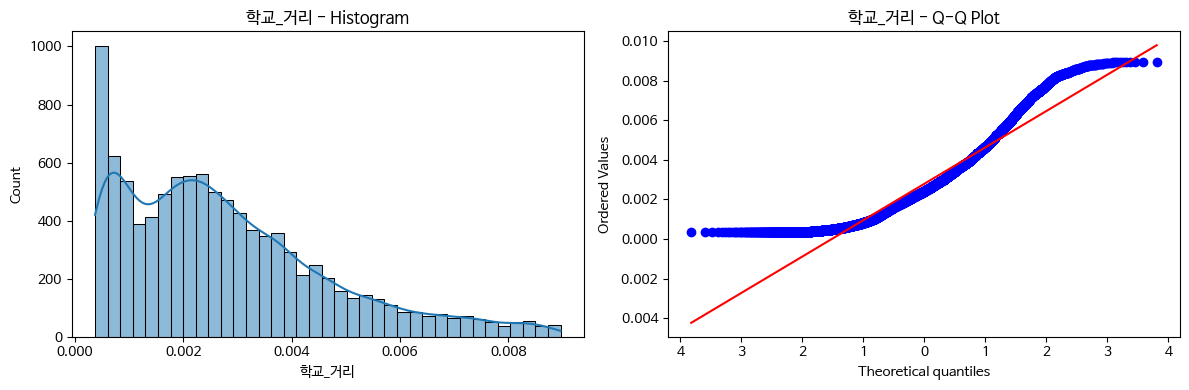

In [ ]:
#IQR로 대체 df_no_outliers
#final
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

selected_columns =["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]

for column in selected_columns:
    plt.figure(figsize=(12, 4))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df_no_outliers[column], kde=True)
    plt.title(f'{column} - Histogram')

    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(df_no_outliers[column], dist="norm", plot=plt)
    plt.title(f'{column} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

#1 극단값 대체 전

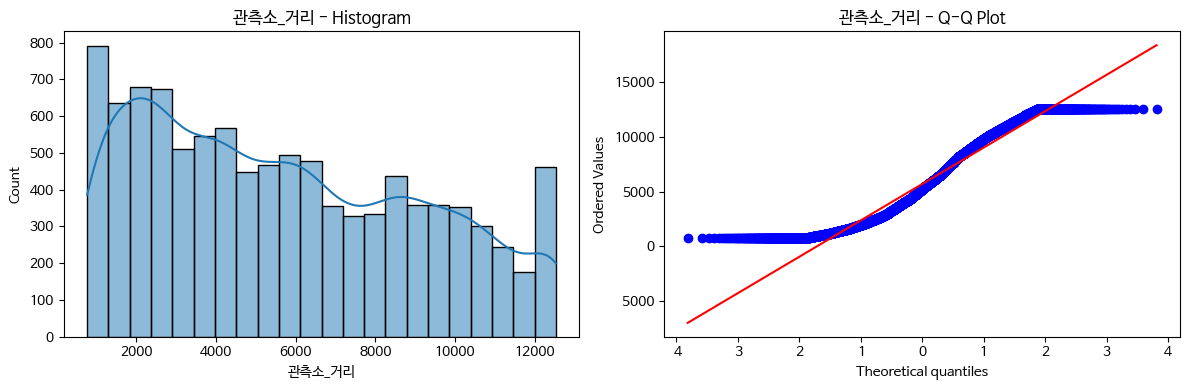

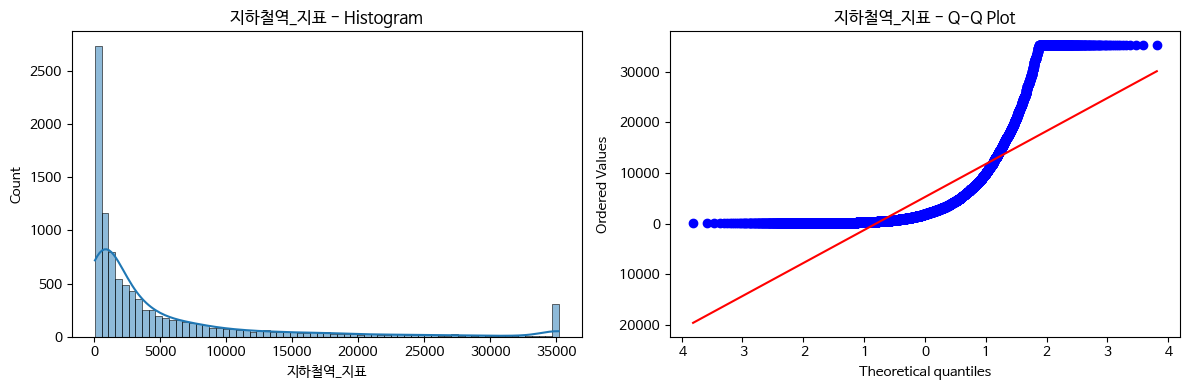

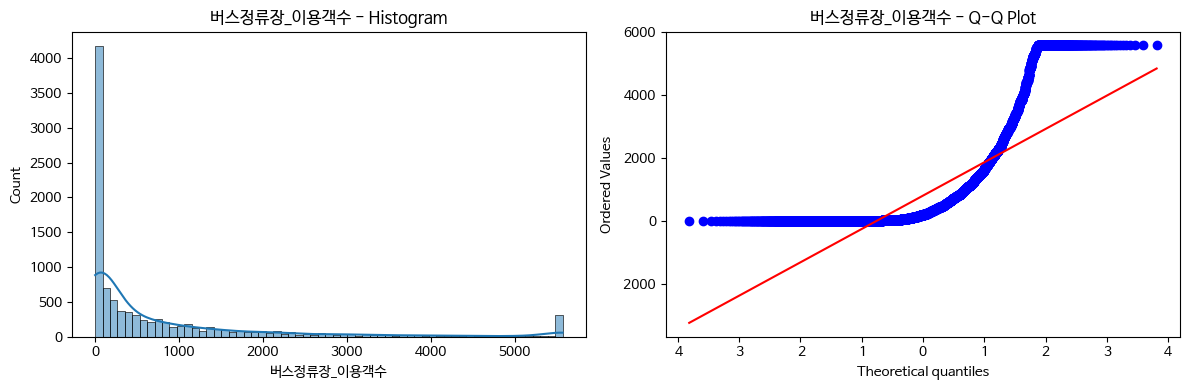

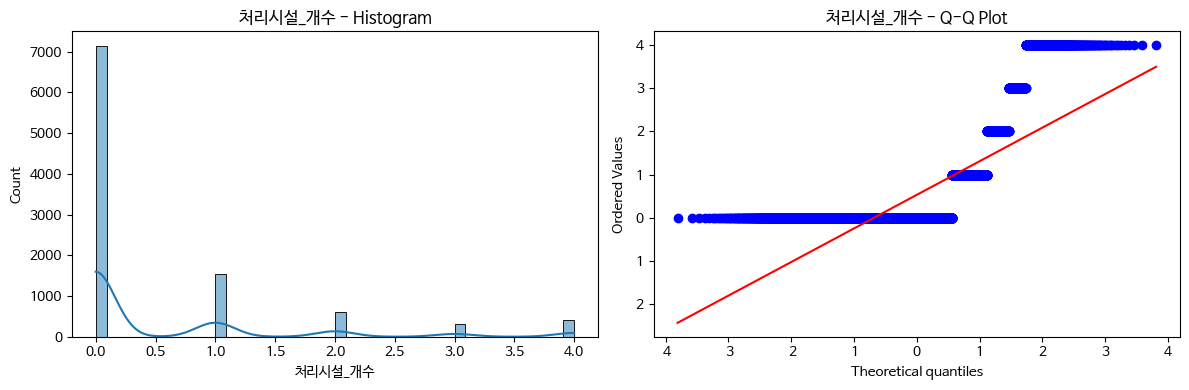

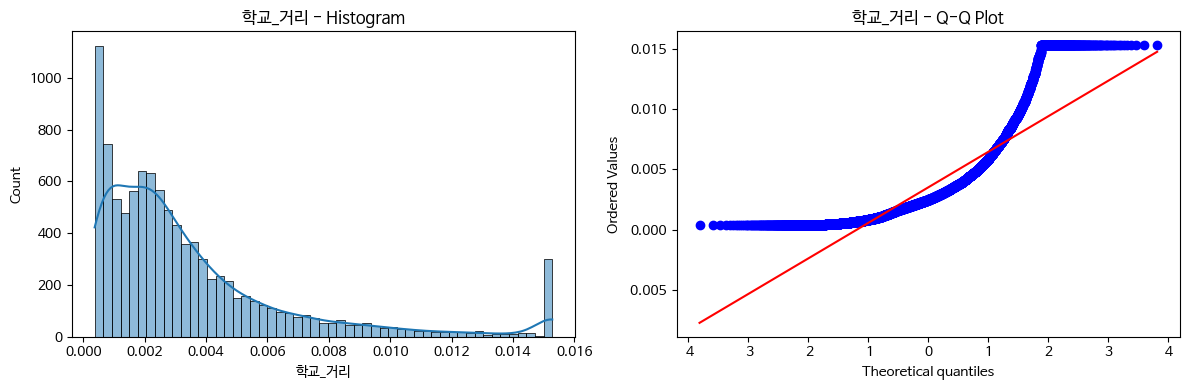

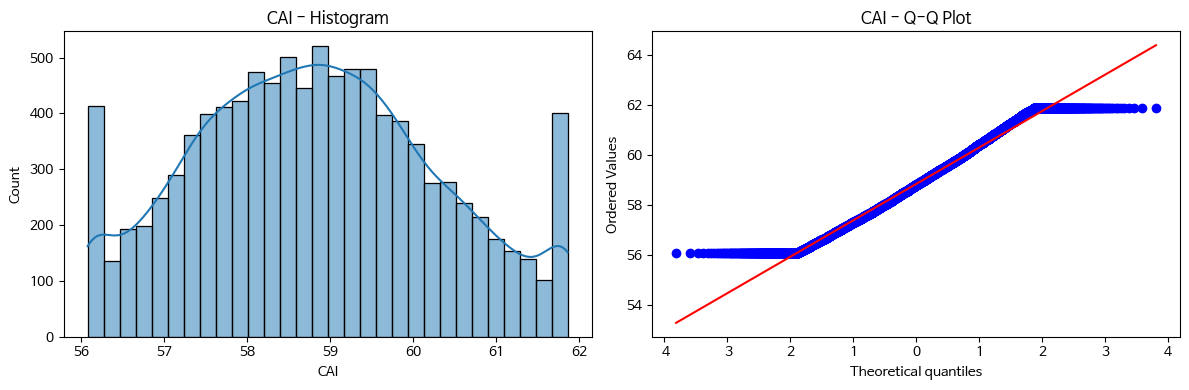

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

selected_columns =["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]

for column in selected_columns:
    plt.figure(figsize=(12, 4))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(dff[column], kde=True)
    plt.title(f'{column} - Histogram')

    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(dff[column], dist="norm", plot=plt)
    plt.title(f'{column} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro, anderson



# 검정 수행 및 결과 출력

selected_columns =["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]

for column in selected_columns:
    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(dff[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat_shapiro}, p-value={p_value_shapiro}')

    # Anderson-Darling test
    result_anderson = anderson(dff[column])
    print(f'Anderson-Darling test for {column}: Statistic={result_anderson.statistic}, Critical Values={result_anderson.critical_values}, Significance Levels={result_anderson.significance_level}')

    print('-' * 50)


Shapiro-Wilk test for 관측소_거리: Statistic=0.9566287398338318, p-value=0.0
Anderson-Darling test for 관측소_거리: Statistic=122.2476878097259, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ]
--------------------------------------------------
Shapiro-Wilk test for 지하철역_지표: Statistic=0.22665488719940186, p-value=0.0
Anderson-Darling test for 지하철역_지표: Statistic=2038.1790720949375, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ]
--------------------------------------------------
Shapiro-Wilk test for 버스정류장_이용객수: Statistic=0.42127424478530884, p-value=0.0
Anderson-Darling test for 버스정류장_이용객수: Statistic=1689.0005680019985, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ]
--------------------------------------------------
Shapiro-Wilk test for 처리시설_개수: Statistic=0.39609086513519287, p-value=0.0
Anderson-Darling test for 처리시설_개수: Statistic=1870.1764173794181, C

In [ ]:
import pandas as pd
from scipy.stats import shapiro, anderson


# 검정 수행 및 결과 출력

selected_columns =["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]

for column in selected_columns:
    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(dff[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat_shapiro}, p-value={p_value_shapiro}, {"Not normal" if p_value_shapiro < 0.05 else "Normal"}')

    # Anderson-Darling test
    result_anderson = anderson(dff[column])
    print(f'Anderson-Darling test for {column}: Statistic={result_anderson.statistic}, Critical Values={result_anderson.critical_values}, Significance Levels={result_anderson.significance_level}, {"Not normal" if result_anderson.statistic > result_anderson.critical_values[2] else "Normal"}')

    print('-' * 50)


Shapiro-Wilk test for 관측소_거리: Statistic=0.9566287398338318, p-value=0.0, Not normal
Anderson-Darling test for 관측소_거리: Statistic=122.2476878097259, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 지하철역_지표: Statistic=0.22665488719940186, p-value=0.0, Not normal
Anderson-Darling test for 지하철역_지표: Statistic=2038.1790720949375, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 버스정류장_이용객수: Statistic=0.42127424478530884, p-value=0.0, Not normal
Anderson-Darling test for 버스정류장_이용객수: Statistic=1689.0005680019985, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 처리시설_개수: Statistic=0.39609086513519287, p-valu

In [ ]:
# 로그 정규화 수행
dff_log = np.log1p(dff)
dff_log
# 결과 출력
print("Original DataFrame:")
print(dff)
print("\nLog-transformed DataFrame:")
print(dff_log)

Original DataFrame:
      cctvid        관측소_거리  버스정류장_이용객수       지하철역_지표     학교_거리  처리시설_개수  \
0      27732    410.618719        1105   4734.835481  0.003987        1   
1      23150   2478.272099          10   1223.498595  0.004408        0   
2      23218    754.534390         555   1519.760748  0.001708        2   
3      13029   5440.834426        8349   2137.518541  0.002264        0   
4      28171   2944.528917         648  11564.442909  0.002774        0   
...      ...           ...         ...           ...       ...      ...   
9995    8426   1926.335513        2083  37705.964955  0.002284        4   
9996   21307  13227.244753          30   4557.375535  0.001101        0   
9997    6071   7183.591012        1398    616.003012  0.001732        0   
9998    2091   1765.773760        1877  11317.730672  0.004915        1   
9999   32129  15159.782711           0    337.964501  0.000534        0   

            CAI  
0     55.735156  
1     64.490861  
2     63.902347  
3     5

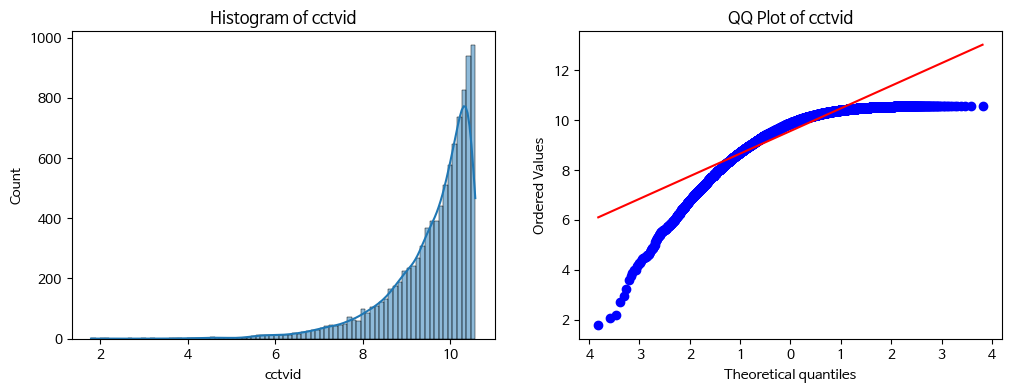

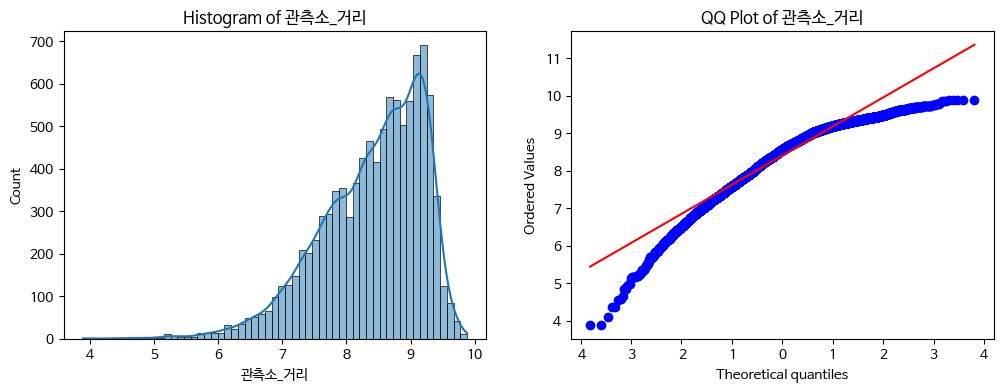

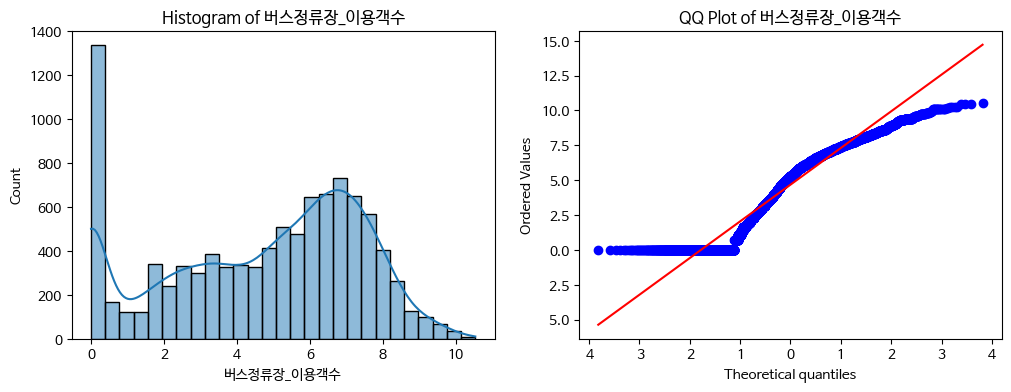

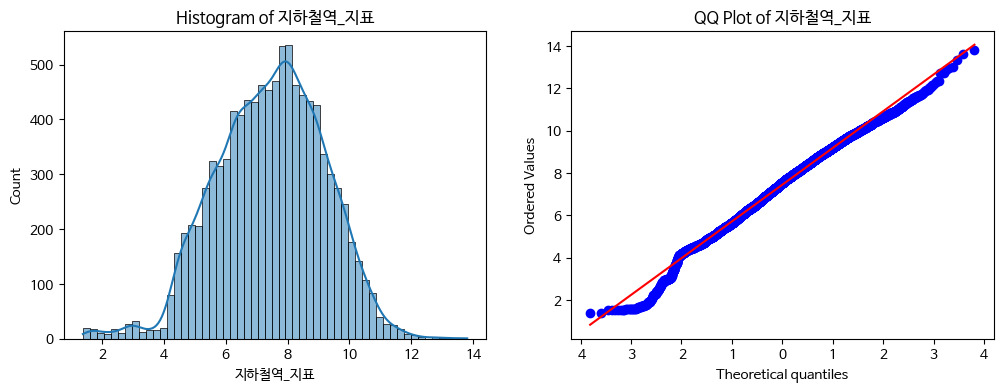

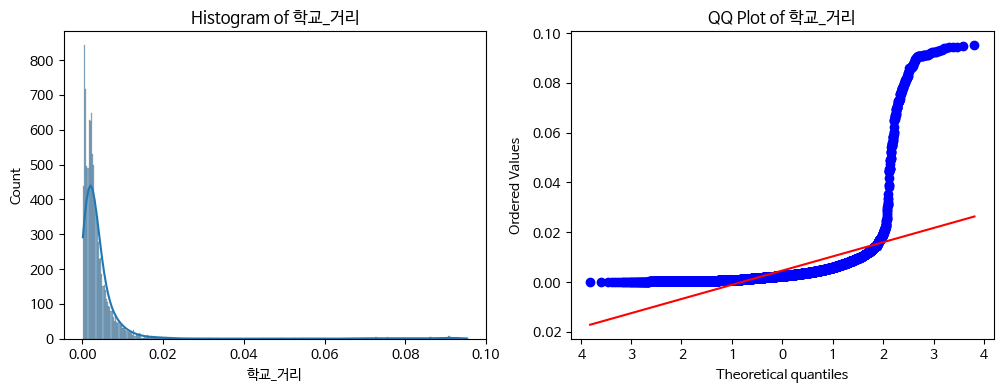

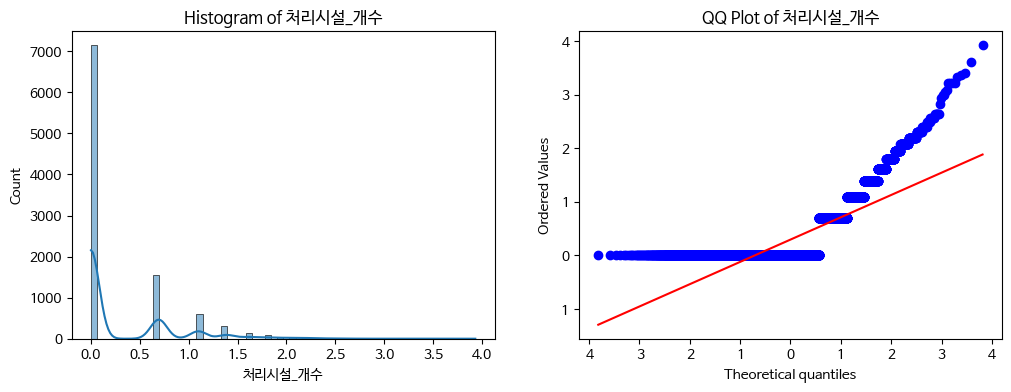

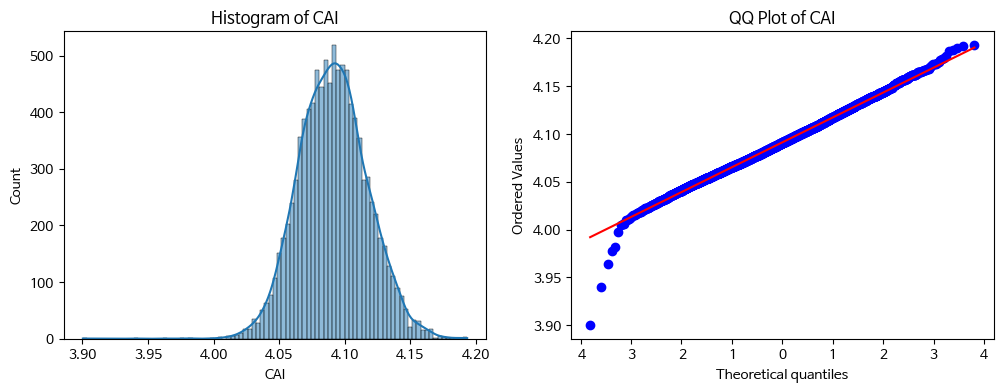

In [ ]:
# 히스토그램 및 QQ 플롯
for column in dff_log.columns:
    plt.figure(figsize=(12, 4))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(dff_log[column], kde=True)
    plt.title(f'Histogram of {column}')

    # QQ 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(dff_log[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')

    plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro, anderson


# 검정 수행 및 결과 출력

selected_columns =["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]

for column in selected_columns:
    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(dff_log[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat_shapiro}, p-value={p_value_shapiro}, {"Not normal" if p_value_shapiro < 0.05 else "Normal"}')

    # Anderson-Darling test
    result_anderson = anderson(dff_log[column])
    print(f'Anderson-Darling test for {column}: Statistic={result_anderson.statistic}, Critical Values={result_anderson.critical_values}, Significance Levels={result_anderson.significance_level}, {"Not normal" if result_anderson.statistic > result_anderson.critical_values[2] else "Normal"}')

    print('-' * 50)


Shapiro-Wilk test for 관측소_거리: Statistic=0.9409433007240295, p-value=0.0, Not normal
Anderson-Darling test for 관측소_거리: Statistic=144.99677667732794, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 지하철역_지표: Statistic=0.9947447180747986, p-value=1.1739474432371749e-18, Not normal
Anderson-Darling test for 지하철역_지표: Statistic=9.451362649813746, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 버스정류장_이용객수: Statistic=0.9354944229125977, p-value=0.0, Not normal
Anderson-Darling test for 버스정류장_이용객수: Statistic=201.68155138552538, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ], Not normal
--------------------------------------------------
Shapiro-Wilk test for 처리시설_개수: Statistic=0.61985337

#1 날씨 지도 EDA

In [ ]:
import pandas as pd
import numpy as np
#pip install folium
raw_data=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/전처리 중 데이터/날씨EDA.csv", encoding='euc-kr')
cctv_data=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/CCTV현황_ver4.csv", encoding='euc-kr')
df = raw_data.drop(["cctvid"], axis=1)
df= df.replace(0, np.nan).dropna()
# cctvid를 기준으로 두 데이터프레임을 결합
merged_data = pd.merge(cctv_data, raw_data, on='cctvid', how='inner')
merged_data= merged_data.replace(0, np.nan).dropna()
merged_data = merged_data.drop(["소재지지번주소"], axis=1)
# 결과 출력
print(merged_data)

             위도          경도  cctvid        관측소_거리       미세먼지      초미세먼지  \
0     37.737015  127.077234   27732    410.618719  31.498714  17.836081   
1     37.277578  127.613895   23150   2478.272099  36.198997  21.231150   
2     37.275391  127.637498   23218    754.534390  35.886641  21.002951   
3     37.303568  127.002626   13029   5440.834426  33.861586  16.938448   
4     37.717627  127.048025   28171   2944.528917  31.815249  17.459207   
...         ...         ...     ...           ...        ...        ...   
9995  37.488233  126.778895    8426   1926.335513  33.534840  18.182649   
9996  37.480422  127.485891   21307  13227.244753  32.421982  19.749770   
9997  37.700965  127.198053    6071   7183.591012  30.333547  16.877815   
9998  37.468841  126.849624    2091   1765.773760  35.183028  19.009707   
9999  36.993488  126.901051   32129  15159.782711  38.913724  22.982480   

         아황산가스        오존     이산화질소     일산화탄소  
0     0.002601  0.028917  0.018549  0.334228  
1    

In [ ]:
print(merged_data)

             위도          경도  cctvid        관측소_거리       미세먼지      초미세먼지  \
0     37.737015  127.077234   27732    410.618719  31.498714  17.836081   
1     37.277578  127.613895   23150   2478.272099  36.198997  21.231150   
2     37.275391  127.637498   23218    754.534390  35.886641  21.002951   
3     37.303568  127.002626   13029   5440.834426  33.861586  16.938448   
4     37.717627  127.048025   28171   2944.528917  31.815249  17.459207   
...         ...         ...     ...           ...        ...        ...   
9995  37.488233  126.778895    8426   1926.335513  33.534840  18.182649   
9996  37.480422  127.485891   21307  13227.244753  32.421982  19.749770   
9997  37.700965  127.198053    6071   7183.591012  30.333547  16.877815   
9998  37.468841  126.849624    2091   1765.773760  35.183028  19.009707   
9999  36.993488  126.901051   32129  15159.782711  38.913724  22.982480   

         아황산가스        오존     이산화질소     일산화탄소  
0     0.002601  0.028917  0.018549  0.334228  
1    

In [ ]:
import folium

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['초미세먼지'] - merged_data['초미세먼지'].min()) / (merged_data['초미세먼지'].max() - merged_data['초미세먼지'].min())

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='#000000',
        fill=True,
        fill_color='#ffab91',
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n초미세먼지: {row['초미세먼지']:}"
    ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_초미세먼지.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_초미세먼지.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=merged_data['미세먼지'].min(), vmax=merged_data['미세먼지'].max())

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['미세먼지'] - merged_data['미세먼지'].min()) / (merged_data['미세먼지'].max() - merged_data['미세먼지'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['미세먼지']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n미세먼지: {row['미세먼지']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_미세먼지_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_미세먼지_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=merged_data['초미세먼지'].min(), vmax=merged_data['초미세먼지'].max())

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['초미세먼지'] - merged_data['초미세먼지'].min()) / (merged_data['초미세먼지'].max() - merged_data['초미세먼지'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['초미세먼지']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n초미세먼지: {row['초미세먼지']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_초미세먼지_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_초미세먼지_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['아황산가스'] - merged_data['아황산가스'].min()) / (merged_data['아황산가스'].max() - merged_data['아황산가스'].min())

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='#000000',
        fill=True,
        fill_color='#ffeb3b',
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n아황산가스: {row['아황산가스']:}"
    ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_아황산가스.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_아황산가스.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=merged_data['아황산가스'].min(), vmax=merged_data['아황산가스'].max())

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['아황산가스'] - merged_data['아황산가스'].min()) / (merged_data['아황산가스'].max() - merged_data['아황산가스'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['아황산가스']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n아황산가스: {row['아황산가스']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_아황산가스_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_아황산가스_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['오존'] - merged_data['오존'].min()) / (merged_data['오존'].max() - merged_data['오존'].min())

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='#000000',
        fill=True,
        fill_color='#76ff03',
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n오존: {row['오존']:}"
    ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_오존.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_오존.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=merged_data['오존'].min(), vmax=merged_data['오존'].max())

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['오존'] - merged_data['오존'].min()) / (merged_data['오존'].max() - merged_data['오존'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['오존']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n오존: {row['오존']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_오존_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_오존_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['이산화질소'] - merged_data['이산화질소'].min()) / (merged_data['이산화질소'].max() - merged_data['이산화질소'].min())

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='#000000',
        fill=True,
        fill_color='#2196f3',
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n이산화질소: {row['이산화질소']:}"
    ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_이산화질소.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_이산화질소.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=merged_data['이산화질소'].min(), vmax=merged_data['이산화질소'].max())

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['이산화질소'] - merged_data['이산화질소'].min()) / (merged_data['이산화질소'].max() - merged_data['이산화질소'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['이산화질소']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n이산화질소: {row['이산화질소']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_이산화질소_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_이산화질소_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['일산화탄소'] - merged_data['일산화탄소'].min()) / (merged_data['일산화탄소'].max() - merged_data['일산화탄소'].min())

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='#000000',
        fill=True,
        fill_color='#ce93d8',
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n일산화탄소: {row['일산화탄소']:}"
    ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_일산화탄소.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_일산화탄소.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = merged_data['위도'].mean()
center_lon = merged_data['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=merged_data['일산화탄소'].min(), vmax=merged_data['일산화탄소'].max())

# 데이터 포인트 추가
for i, row in merged_data.iterrows():
    size = min_size + (max_size - min_size) * (row['일산화탄소'] - merged_data['일산화탄소'].min()) / (merged_data['일산화탄소'].max() - merged_data['일산화탄소'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['일산화탄소']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n일산화탄소: {row['일산화탄소']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_일산화탄소_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_일산화탄소_ver2.html')

In [ ]:
import pandas as pd
import numpy as np
pip install folium
import folium



data_final_10=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/최종조인데이터_지수변환후_10.csv", encoding='euc-kr')

In [ ]:
dff2= data_final_10

In [ ]:
dff2

,cctvid,관측소_거리,버스정류장_이용객수,지하철역_지표,학교_거리,처리시설_개수,CAI
0,27732,410.618719,1105,4734.835481,0.003987,1,55.735156
1,23150,2478.272099,10,1223.498595,0.004408,0,64.490861
2,23218,754.534390,555,1519.760748,0.001708,2,63.902347
3,13029,5440.834426,8349,2137.518541,0.002264,0,53.861586
4,28171,2944.528917,648,11564.442909,0.002774,0,54.763218
...,...,...,...,...,...,...,...
9995,8426,1926.335513,2083,37705.964955,0.002284,4,58.978887
9996,21307,13227.244753,30,4557.375535,0.001101,0,59.136582
9997,6071,7183.591012,1398,616.003012,0.001732,0,57.693381
9998,2091,1765.773760,1877,11317.730672,0.004915,1,58.251577


In [ ]:
# cctvid를 기준으로 inner join 수행
DF_CAI = pd.merge(dff2, merged_data, on='cctvid', how='inner')

# 결과 출력
print(DF_CAI)

      cctvid      관측소_거리_x  버스정류장_이용객수       지하철역_지표     학교_거리  처리시설_개수  \
0      27732    410.618719        1105   4734.835481  0.003987        1   
1      23150   2478.272099          10   1223.498595  0.004408        0   
2      23218    754.534390         555   1519.760748  0.001708        2   
3      13029   5440.834426        8349   2137.518541  0.002264        0   
4      28171   2944.528917         648  11564.442909  0.002774        0   
...      ...           ...         ...           ...       ...      ...   
9994    8426   1926.335513        2083  37705.964955  0.002284        4   
9995   21307  13227.244753          30   4557.375535  0.001101        0   
9996    6071   7183.591012        1398    616.003012  0.001732        0   
9997    2091   1765.773760        1877  11317.730672  0.004915        1   
9998   32129  15159.782711           0    337.964501  0.000534        0   

            CAI         위도          경도      관측소_거리_y       미세먼지      초미세먼지  \
0     55.735156  37.7

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = DF_CAI['위도'].mean()
center_lon = DF_CAI['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=DF_CAI['CAI'].min(), vmax=DF_CAI['CAI'].max())

# 데이터 포인트 추가
for i, row in DF_CAI.iterrows():
    size = min_size + (max_size - min_size) * (row['CAI'] - DF_CAI['CAI'].min()) / (DF_CAI['CAI'].max() - DF_CAI['CAI'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['CAI']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \nCAI: {row['CAI']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_CAI_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_CAI_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import folium



data_final_ver0=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/최종데이터_final_ver1.csv", encoding='euc-kr')

In [ ]:
# cctvid를 기준으로 inner join 수행
data_final_ver1 = pd.merge(data_final_ver0, merged_data, on='cctvid', how='inner')


In [ ]:
data_final_ver1

,cctvid,관측소_거리_x,버스정류장_이용객수,지하철역_지표,학교_거리,처리시설_개수,CAI,위도,경도,관측소_거리_y,미세먼지,초미세먼지,아황산가스,오존,이산화질소,일산화탄소
0,27732.0,773.428059,1105.0,4734.835481,0.003987,1.0,56.081565,37.737015,127.077234,410.618719,31.498714,17.836081,0.002601,0.028917,0.018549,0.334228
1,23150.0,2478.272099,10.0,1223.498595,0.004408,0.0,61.861948,37.277578,127.613895,2478.272099,36.198997,21.231150,0.002275,0.029683,0.015465,0.347770
2,23218.0,773.428059,555.0,1519.760748,0.001708,2.0,61.861948,37.275391,127.637498,754.534390,35.886641,21.002951,0.002269,0.029679,0.015476,0.349678
3,13029.0,5440.834426,1078.0,2137.518541,0.002264,0.0,56.081565,37.303568,127.002626,5440.834426,33.861586,16.938448,0.002136,0.029796,0.020958,0.411717
4,28171.0,2944.528917,648.0,11564.442909,0.002774,0.0,56.081565,37.717627,127.048025,2944.528917,31.815249,17.459207,0.002643,0.029349,0.017278,0.343978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8426.0,1926.335513,2083.0,10071.799945,0.002284,1.2,58.978887,37.488233,126.778895,1926.335513,33.534840,18.182649,0.001915,0.030839,0.020920,0.432972
9995,21307.0,12530.164851,30.0,4557.375535,0.001101,0.0,59.136582,37.480422,127.485891,13227.244753,32.421982,19.749770,0.001911,0.028841,0.012196,0.411839
9996,6071.0,7183.591012,1398.0,616.003012,0.001732,0.0,57.693381,37.700965,127.198053,7183.591012,30.333547,16.877815,0.001984,0.031797,0.013047,0.336194
9997,2091.0,1765.773760,1877.0,11317.730672,0.004915,1.0,58.251577,37.468841,126.849624,1765.773760,35.183028,19.009707,0.002078,0.029610,0.020523,0.435150


In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = data_final_ver1['위도'].mean()
center_lon = data_final_ver1['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=data_final_ver1['지하철역_지표'].min(), vmax=data_final_ver1['지하철역_지표'].max())

# 데이터 포인트 추가
for i, row in  data_final_ver1.iterrows():
    size = min_size + (max_size - min_size) * (row['지하철역_지표'] - data_final_ver1['지하철역_지표'].min()) / (data_final_ver1['지하철역_지표'].max() - data_final_ver1['지하철역_지표'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['지하철역_지표']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n지하철역_지표: {row['지하철역_지표']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_지하철역_지표_이상치제거_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_지하철역_지표_이상치제거_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from branca.colormap import LinearColormap

# 지도의 중심을 정하기 위해 평균 위도와 경도 계산
center_lat = data_final_ver1['위도'].mean()
center_lon = data_final_ver1['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_size, max_size = 5, 20

# 미세먼지에 따른 그라데이션 색상 설정
colormap = LinearColormap(colors=['#00e676', '#ffea00', '#ff1744'], vmin=data_final_ver1['버스정류장_이용객수'].min(), vmax=data_final_ver1['버스정류장_이용객수'].max())

# 데이터 포인트 추가
for i, row in  data_final_ver1.iterrows():
    size = min_size + (max_size - min_size) * (row['버스정류장_이용객수'] - data_final_ver1['버스정류장_이용객수'].min()) / (data_final_ver1['버스정류장_이용객수'].max() - data_final_ver1['버스정류장_이용객수'].min())

    # CircleMarker 테두리 색상 제거
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=size,
        color='',  # 테두리 색상 제거
        fill=True,
        fill_color=colormap(row['버스정류장_이용객수']),
        fill_opacity=0.6,
        popup=f"\ncctvid:{row['cctvid']} \n버스정류장_이용객수: {row['버스정류장_이용객수']:}"
    ).add_to(m)

# Colormap을 맵에 추가
colormap.add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 생성된 지도를 HTML 파일로 저장
m.save('map_버스정류장_이용객수_이상치제거_ver2.html')
from google.colab import files

# 생성된 HTML 파일 다운로드
files.download('map_버스정류장_이용객수_이상치제거_ver2.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>